# Overview

## Imports and image loading

In [1]:
import math
import matplotlib
import matplotlib.pyplot as plt

from PIL import Image
import PIL.ImageOps
import numpy as np
from scipy import ndimage

In [2]:
cam = Image.open('cameraman.tif', mode='r')
tire = Image.open('tire.tif', mode='r')
lena = Image.open('lena.tiff', mode='r')

## Introduction
In this lab we look at the basics of image processing in the Matlab/Python environments. The topics of image analysis, resizing, point operations, histogram creation and equalization are all created and demonstrated on test images. Also throughout are conclusion and observations gained along with answers to the questions given in the lab documentation. 

# Image Quality Measures

## Make a darker Lena for testing MSE and PSNR

In [3]:
lena_arr = np.array(lena)
lena_dark = np.true_divide(lena_arr, 1.01)
lena_dark = Image.fromarray(np.uint8(lena_dark))

## Define MSE and PSNR

In [4]:
def MSE(im1, im2):
    assert im1.size == im2.size and im1.mode == im2.mode
  
    im1_data = np.array(im1, dtype=np.int32).flatten()
    im2_data = np.array(im2, dtype=np.int32).flatten()
    
    M = len(im1_data)
    
    MSE = np.power(np.subtract(im1_data, im2_data), 2).sum() / M
    return MSE

def PSNR(im1, im2):
    assert im1.size == im2.size and im1.mode == im2.mode
    mse = MSE(im1, im2)
    if mse == 0:
        return math.inf
    return 10 * math.log10(65025.0 / mse) # 255^2 = 65025

In [5]:
print("MSE: " + str(MSE(lena, lena_dark)))
print("PSNR: " + str(PSNR(lena, lena_dark)))

MSE: 3.64304351807
PSNR: 42.51616001719539


# Image Resizing

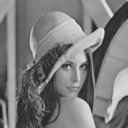

In [6]:
lena_grayscale = lena.convert(mode="L")
cam_grayscale = cam.convert(mode="L")
lena_size = np.int32(np.true_divide(lena_grayscale.size, 4))
cam_size = np.int32(np.true_divide(cam_grayscale.size, 4))
lena_downscale = lena_grayscale.resize(lena_size, resample=Image.BILINEAR)
cam_downscale = cam_grayscale.resize(cam_size, resample=Image.BILINEAR)
lena_downscale

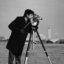

In [7]:
cam_downscale

Both images where reduced by a scale of 4 using Bi-Linear Interpolation. Resized and grayscaled images are shown above.

## Nearest Neighbour

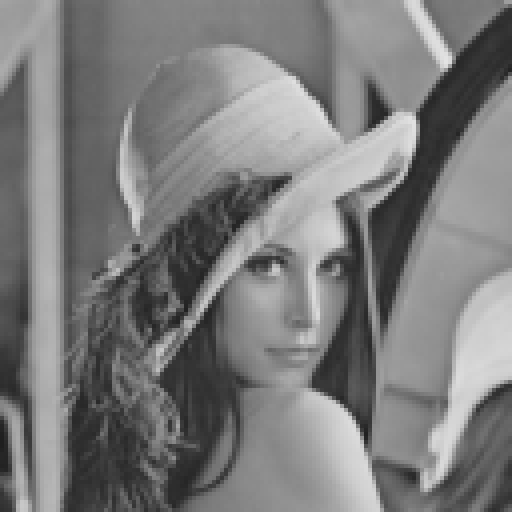

In [8]:
lena_nearest = lena_downscale.resize(lena_grayscale.size, resample=Image.NEAREST)
lena_nearest

In [9]:
print("MSE: " + str(MSE(lena_grayscale, lena_nearest)))
print("PSNR: " + str(PSNR(lena_grayscale, lena_nearest)))

MSE: 139.970748901
PSNR: 26.670430746041873


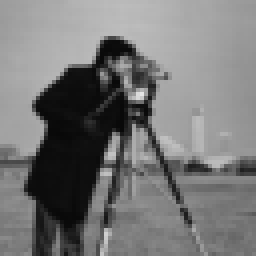

In [10]:
cam_nearest = cam_downscale.resize(cam_grayscale.size, resample=Image.NEAREST)
cam_nearest

In [11]:
print("MSE: " + str(MSE(cam_grayscale, cam_nearest)))
print("PSNR: " + str(PSNR(cam_grayscale, cam_nearest)))

MSE: 456.067169189
PSNR: 21.540515509664747


## Bilinear Interpolation

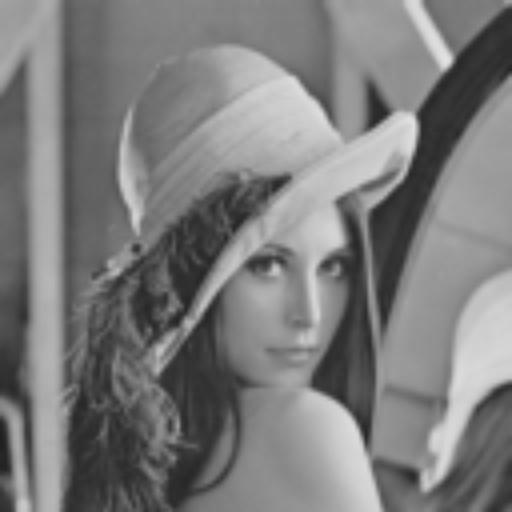

In [12]:
lena_bilinear = lena_downscale.resize(lena_grayscale.size, resample=Image.BILINEAR)
lena_bilinear

In [13]:
print("MSE: " + str(MSE(lena_grayscale, lena_bilinear)))
print("PSNR: " + str(PSNR(lena_grayscale, lena_bilinear)))

MSE: 121.232467651
PSNR: 27.294614156786675


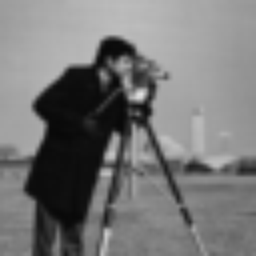

In [14]:
cam_bilinear = cam_downscale.resize(cam_grayscale.size, resample=Image.BILINEAR)
cam_bilinear

In [15]:
print("MSE: " + str(MSE(cam_grayscale, cam_bilinear)))
print("PSNR: " + str(PSNR(cam_grayscale, cam_bilinear)))

MSE: 427.630157471
PSNR: 21.820120357968378


## Bicubic Interpolation

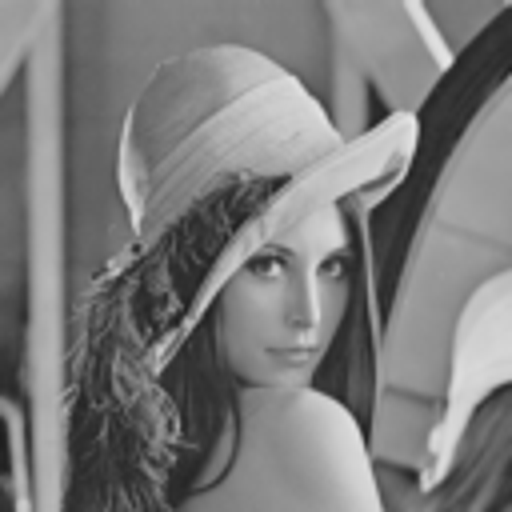

In [16]:
lena_bicubic = lena_downscale.resize(lena_grayscale.size, resample=Image.BICUBIC)
lena_bicubic

In [17]:
print("MSE: " + str(MSE(lena_grayscale, lena_bicubic)))
print("PSNR: " + str(PSNR(lena_grayscale, lena_bicubic)))

MSE: 101.099140167
PSNR: 28.08332898869516


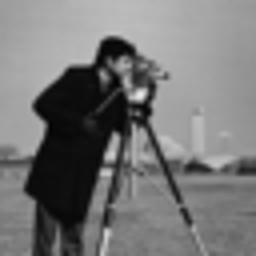

In [18]:
cam_bicubic = cam_downscale.resize(cam_grayscale.size, resample=Image.BICUBIC)
cam_bicubic

In [19]:
print("MSE: " + str(MSE(cam_grayscale, cam_bicubic)))
print("PSNR: " + str(PSNR(cam_grayscale, cam_bicubic)))

MSE: 385.782684326
PSNR: 22.2673763022557


## Questions - Section 2:
**1. What can you observe about the up-sampled image produced by each of the methods?**

Each method was unable to perfectly replicate the original image. In terms of quality BiCubic Interpolation had the best, BiLinear Interpolation the second best and Nearest Neighbour the worst as expected. Interesting to note that two the naked eye the differences between BiCubic and BiLinear were hard to see. 

Comparing the cameraman image vs lena image, in each iteration the lena image had a much better quality when upscaled. This was most likely because the lena image had many more pixels to work with as opposed to the camerman photo. 

**2. How do the different methods compare to each other in terms of PSNR as well as visual quality? Why?**

First the PSNR values for each iteration:
Nearest Neighbour: 
- Lena: 26.67
- Camerman: 21.54

BiLinear Interpolation: 
- Lena: 27.29
- Camerman: 21.82

BiCubic Interpolation: 
- Lena: 28.08
- Camerman: 22.26

From this we can see that each method produced a PSNR that relatively close to each other but has improvements as the methods changed. We can also see that the PSNR is greater is for Lena image vs Cameraman image in all methods. 

**3. What part of the image seems to work well using these digital zooming methods? What parts of the image doesn't? Why?**

These methods seem to work well for areas that have gradual color changes or a steady color across an area. For example the sky in the cameraman photo and the shoulder/face in the Lena photo. These edges do well because the colors blend well together and are more seamless.

In contrast the edges of the photos are were the most smoothing/blurring is noticeable, especially in the nearest neighbour section. These method make the edges less sharp than they should be. This is especially noticeable when looking at the camera tripod in the cameraman photo or the hat feathers in the Lena photo. 

**4. Compare the zooming results between Lena and Cameraman. Which image results in higher PSNR? Which image looks better when restored to original resolution using digital zoomming methods? Why?**

The Lena image results in a higher PSNR and typically looks better when restored to orginal resolution. This is because the Lena photo had a much larger resolution to begin with and thus was its size was reduced by a scale of four it didn't become as small as the camerman photo. Larger resolution means that the algorithm has more pixels to work with when restoring the photo. 

A small factor in the comparision between photos is that the cameraman photo is dominated by the black coat/outfit being worn by the person in the photo. This means there is a sharpely contrasted edge throughout the center of the photo. In contrast to this the Lena photo has less high contrast edges in the photo and thus appears better when upscaled. 

# Convolutions

In [20]:
h1 = np.array([[1/6, 1/6, 1/6, 1/6, 1/6, 1/6]])
h2 = np.transpose(h1)
h3 = np.array([[-1.0, 1.0]])

In [21]:
lena_greyscale = lena.convert(mode="L")
lena_greyscale_arr = np.array(lena_greyscale)

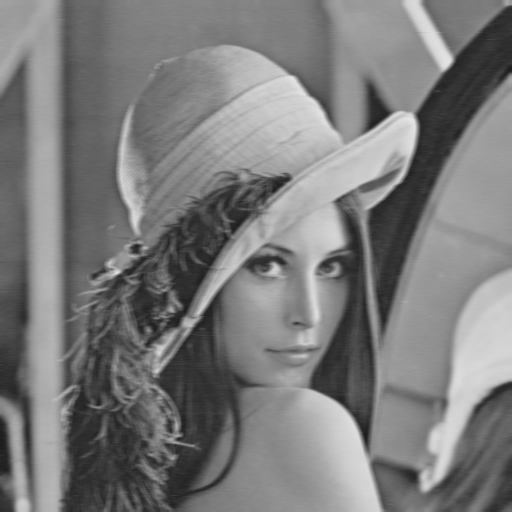

In [22]:
lena_greyscale_h1 = ndimage.convolve(lena_greyscale_arr, h1)
Image.fromarray(lena_greyscale_h1, 'L')

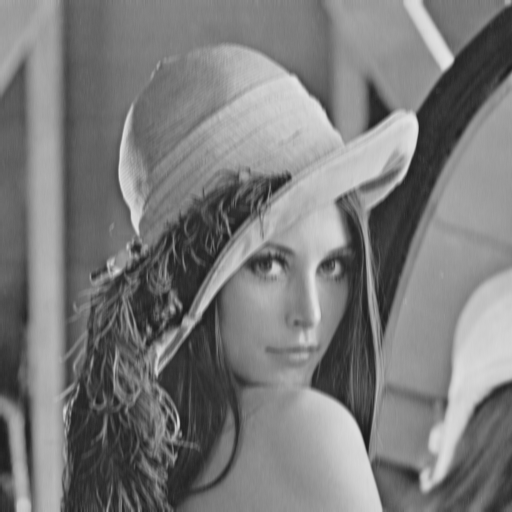

In [23]:
lena_greyscale_h2 = ndimage.convolve(lena_greyscale_arr, h2)
Image.fromarray(lena_greyscale_h2, 'L')

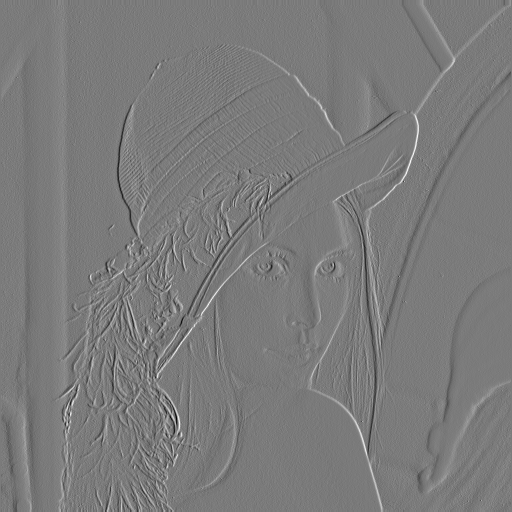

In [24]:
lena_greyscale_h3 = ndimage.convolve(np.float32(lena_greyscale_arr), np.float32(h3))
Image.fromarray(np.uint8((lena_greyscale_h3-np.min(lena_greyscale_h3))), 'L') # We also normalise to grey here

### Questions - Section 3

**1. What did convolving the image with h1 do to the image?  Looking at the impulse function, explain why convolving the image with h1 yields such results.**

Convolving the image with h1 performs a horizontal "motion blur" on the image. h1 is a 6-wide horizontal vector of 1/6 which means that when convolved, each pixel will be the average of the pixel, the 2 pixels immediately to the left and the 3 to the right (or 3 to the left and 2 to the right, depending on the implementation of the convolving algorithm), causing a horizontal bluring effect.

**2.  What did convolving the image with h2 do to the image?  Looking at the impulse function, explain why convolving the image with h2 yields such results.**

Convolving the image with h2 had the same effect as h1, except the effect is vertical due to the h2 being vertical, and so averaging each pixel with pixels above and below it.

**3.  What did convolving the image with h3 do to the image?  Looking at the impulse function, explain why convolving the image with h3 yields such results.**

Convolving the image with h3 enhances the edges. Edges that go from light to dark in the left to right direction show up as light, and dark to light edges go dark. Relatively constant areas of the image go to a mid grey.

**4.  Based on these results, what role can convolution perform in the context of image processing?**

Based on these results, convolution can perform operations that depend on the relative colours of pixels in a region such as smoothing, sharpening, edge detection, edge enhancing, etc.

# Point Operations for Image Enhancement

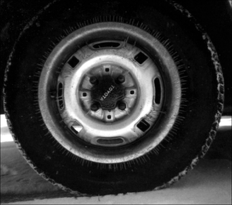

In [25]:
tire

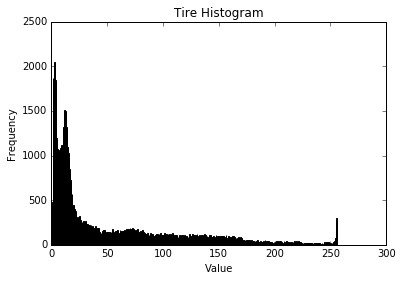

In [26]:
%matplotlib inline
tire_hist = tire.histogram()
plt.bar([i for i in range(256)], tire_hist)
plt.title("Tire Histogram")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

## Questions - Section 5.1:
**1. Explain what the histogram of an image represents. Why is it useful?**

An image histogram respresents the frequency of pixels in the image by intensity. So a histogram will typically on the x axis list the different values of intensity and on the y axis represent the frequency or amount of occurences. Thus you can see how many pixels occurs of each intensity.

This is very useful as it allows us to determine several things. What intensity dominates the image or is there a balance of all intensities across the image? Is it a high contrast image with high occurences at the extreme frequencies or low intensity with high occurences in the middle? Almost any convulotions or filtering will take into account how the histogram of the image looks. 

**2. Describe how the histogram looks like in the context of intensity distribution. What does the histogram say about the image?**

The histogram allows us to both mathematically and generally say what intensities are most occuring in the image. In our example tire image we see that there is mostly lower intensities in our tire image. This makes sense because the majority of the image is the dark tire or background. Thus we expect our histogram to be heavy on the left side (where the intensity is lowest on the x-axis). The histogram also allows us to analyze the contrast of an image by comparing the distribution of pixels across the different intensities. 


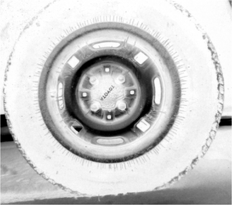

In [27]:
tire_invert = PIL.ImageOps.invert(tire)
tire_invert

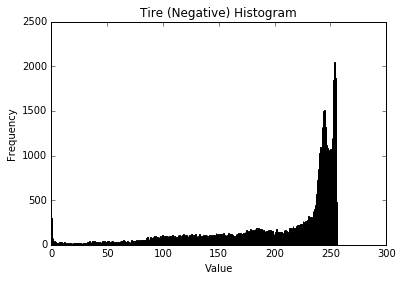

In [28]:
%matplotlib inline
tire_inverthist = tire_invert.histogram()
plt.bar([i for i in range(256)], tire_inverthist)
plt.title("Tire (Negative) Histogram")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

## Questions - Section 5.2:
**1. Describe how the histogram looks like in the context of intensity distribution. How does it differ from the histogram of the original image? Why?**

This histogram shows the image as being dominated by high intensity pixels. We can say this because the value skyrocket at approximately ~230-240. If we were to see this histogram and then look at the image we would say that there is a high amount of white or light pixels, which there is. 

The histogram for this image is the reversed of our original histogram. This makes sense because we inverted the image so every pixel at 0 becomes 256 and so on. This means that our frequency values for 0 intensity will now switch with the intesity values for 256. This is why the graph is flipped on the x axis. This histogram is now a right heavy grpah or a high intensity dominated image. 

In [29]:
def PowerLaw1(pixelvalue):
    return pixelvalue ** 0.5

def PowerLaw2(pixelvalue):
    return pixelvalue ** 1.3

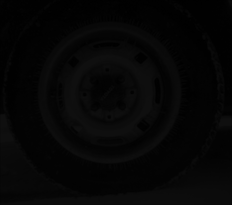

In [30]:
tire_power1 = Image.eval(tire, PowerLaw1)
tire_power1

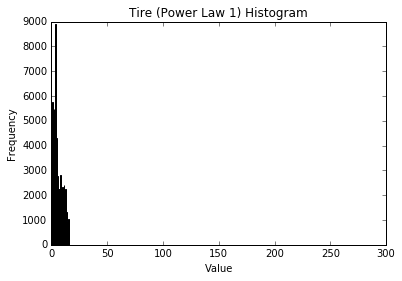

In [31]:
%matplotlib inline
tirep1_hist = tire_power1.histogram()
plt.bar([i for i in range(256)], tirep1_hist)
plt.title("Tire (Power Law 1) Histogram")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

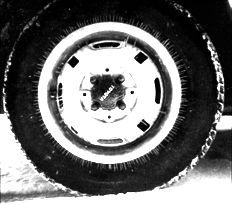

In [32]:
tire_power2 = Image.eval(tire, PowerLaw2)
tire_power2

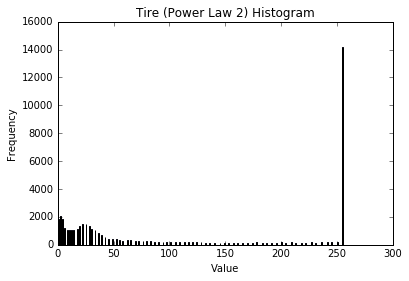

In [33]:
%matplotlib inline
tirep2_hist = tire_power2.histogram()
plt.bar([i for i in range(256)], tirep2_hist)
plt.title("Tire (Power Law 2) Histogram")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

## Questions - Section 5.3:
**1. Describe appearance of transformed images. Why do they appear this way?**
The first image is much darker because we took every intensity value and changed it to the square root of itself. This means that each pixel would become a darker/lesser intensity value thereby making the whole image darker. However this value was much stronger in the first image because of the exponential nature of the function (rather than a simple division or scalar subtraction).

The second image appears to have higher contrast because the function x^1.3 has a much greater effect on higher values than it does on lower values. If you graph the function x^1.3 you see that around x=50 it starts to climb more steeply. In regards to our image this power function would cause the lighter pixels to have an even greater intensity with less of an effect on the lower range of intensities.

That's why in the second image we see a higher contrast between the lower intensity and lighter intensity sections. 

**2. Descrie how each of the histograms looks like in the context of intensity distribution. Why do they look like this? What does each histogram say about each transformed image?**

The first histogram shows, as expected, a high range of values between 0 and 50 with very few outside of that. Again this is because the power transoformation fucntion heavily reduced each higher intensity values. This histogram reflects the fact that the image is mostly black or extremely dark pixels. 

The second histogram shows a high range of pixels maxed at high intensity. This is because our power function drove all the higher value pixels to their max. As such our image has a high contrast due to the concentrations of pixels at the high and low end of the spectrum, with very few in the middle. 

**3. Compared with the original image, which of the transforms should you used to enhance the image? Why?**

The second transform should/could be used to create a higher contrast image thus it would be the most useful to enhance the image. The first transform makes the image extremely too low intensity so that the original shapes, edges and features of the image are almost completely lost. 

The second transform on the other hand still allows us to the see the shapes, edges and features of the image. In fact many of the edges are enhanced because of the higher contrast (i.e. the inner diameter of the tire vs the outer diameter)

The following figure below where generated in matlab using the *histeq* and *hist* functions respectively. The first is the tire image equalized and the second is the full histogram of the equalized image.

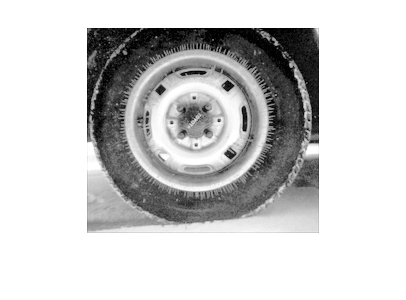

In [34]:
tire_eq = Image.open('tire hist eq.tif', mode='r')
tire_eq

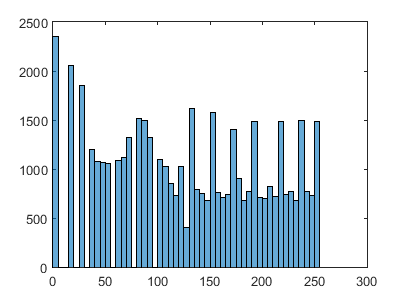

In [35]:
tire_eq_hist = Image.open('tire_eq_hist.tif', mode='r')
tire_eq_hist

Histogram Equalization Graph (Taken from Matlab)
(x-axis - Intensity)
(y-axis - Frequency)

## Questions - Section 5.4:
**1. Describe the appearance of the equalized image.**
The equalized image has a more balanced range of greyscale values. In the first image most of it is dominated by the dark tire and background. However in the equalized image there is a range of greys across the tire, allowing you to see different indents/patterns on the tire more clearly. However somethings that were clearer in the first picture (i.e. the shadow on the ground) are now less clear or distinguishable in the equalized photo. 

**2. Describe how the histogram looks like in the context of intensity distribution. Why does it look like this? What does each histogram say about each equalized image?**

The histogram shows us that the image intensity values across all ranges are more balance or equal. In the original histogram most of the pixels were around the lower ranges (0-~25) whereas in the new histogram we see comparables maxes all across the range of intensity. There is still the highest max at 0 but other values are comparable in frequency.

Also small note there are now values in the histogram that have 0 frequency. 

# Conclusion:
In summary five separate functions or actions where explored in the Matlab/Python environment. All of these function involved manipulating, changing or taking data from images. 

First section involved creating a function to calculate the Peak Signal to Noise Ratio by comparing two images. This function was given to us mathematically and was to be replicated in our own code. This function was later used to analyze the sucess of images that were upscaled or downscaled using various methods. 

Next we needed to take our original images and downsize them using bilinear interpolation. We then took the downscaled imaged and upscaled them using one of the three methods (Nearest Neighbour, Bilinear Interpolation or BiCubic Interpolation). From these results we saw that BiCubic Interpolation method is the best for upscaling and downscaling. In addition to this we saw that higher resolution images produce better results when upscaling or downscaling due to the extra pixels that are avaliable for analyzing.

In the next section we covered a variety of discrete convolutions to be used for image processing. The first one was a horizontal blur, the second was a vertical blur and the third was edge enhancement.

In the last section we examined the creation of histograms and what they tell us about the images. Histograms model the the distribution of different pixel intensities from the whole image. Histograms allow us to tell the overall distrbution of intensities in an image or the contrast of an image. Also examined was how histogram equalization attempts to take the different frequency levels and average them out so there is a more balanced distribution across the intensities. 